In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df=pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/concrete.csv")

In [10]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
x=df.copy()
y=x.pop("CompressiveStrength")


# 互信息及其测量内容

1.互信息很像相关性，用来衡量两个量之间的关系。
2.优点：可以检测任何一种关系，对比相关性来说，相关性只检测线性关系
3.互信息可用于使用和解释，计算效率高，理论上有根据，抗过拟合，检测任何类型的关系
4.两个量之间的互信息（MI）是衡量一个量之间的知识在多大程度上减少了另一个量的不确定性
4.不确定性是使用信息论中称为“熵”的量来衡量的。变量的熵是指：“平均需要多少个是或否的问题来描述该变量的出现。你要问的问题越多，你对变量的不确定性就越大。相互信息是您希望该功能回答的有关目标的问题数量。

# 解释互信息分数

1.互信息分数的最小值为0.0，这意味着两者相互独立，不能告诉任何关于对方的信息(高于2.0的值并不常见)
2.一个功能在与其他功能交互时可能信息量很大，但单独提供的信息量就不那么大了。MI是一个单变量指标，无法检测要素的交互
3.功能的实际有用性取决于使用它的模型。特征仅在其与目标的关系是模型可以学习的范围内才有用，仅仅因为一个特征具有高 MI 分数并不意味着您的模型能够对该信息执行任何操作。

# 实例：

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
df=pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [25]:
X=df.copy() 
y=X.pop("price") 
"""弹出price这一列"""

for colname in X.select_dtypes("object"):
#X.select_dtypes("object")----提取字符串列
    X[colname], _=X[colname].factorize()
    #factorize()返回两个值：1.整数编码后的数据，2.一个包含唯一类别的Series
    """此处使用下划线舍弃了第二个返回值"""
    
    
discrete_features = X.dtypes == int
#X.dtypes 返回一个Series,其中包含X列的数据类型；接着判断是否为int型，返回True或False

MI的scikit-learn算法对离散特征和连续特征的处理不同；1.任何float dtype的数据都不离散，2.类别(object或categorical dtype)可以通过给一个标签编码而被视为离散的

scikit-learn算法在特征选择模块有两个互信息度量：1.mutual_info_retraction(实值目标)，2.mutual_info_classif(分类目标)

上述中，目标价格是实值的，所以接下来将计算其功能的MI分数

In [27]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y,discrete_features):
    """定义函数，计算特征与目标变量之间的互信息得分"""
    mi_scores=mutual_info_regression(X,y,discrete_features=discrete_features)
    #使用mutual_info_regression()方法，计算互信息得分，X为特征数据，y为目标变量，discrete_features为互信息得分(其中等于号为了增加可读性)
    
    mi_scores=pd.Series(mi_scores,name="MI scores",index=X.columns)
    #创建一个Series显示互信息得分，索引为X特征数据中的列名称
    
    mi_scores=mi_scores.sort_values(ascending=False)
    #按降序排列
    
    return mi_scores

mi_scores=make_mi_scores(X,y,discrete_features)
#调用函数
mi_scores[::3]
#每隔3切片一次

curb_weight          0.913662
highway_mpg          0.888012
length               0.615810
fuel_system          0.464673
drive_wheels         0.332880
symboling            0.230677
compression_ratio    0.088868
fuel_type            0.047279
Name: MI scores, dtype: float64

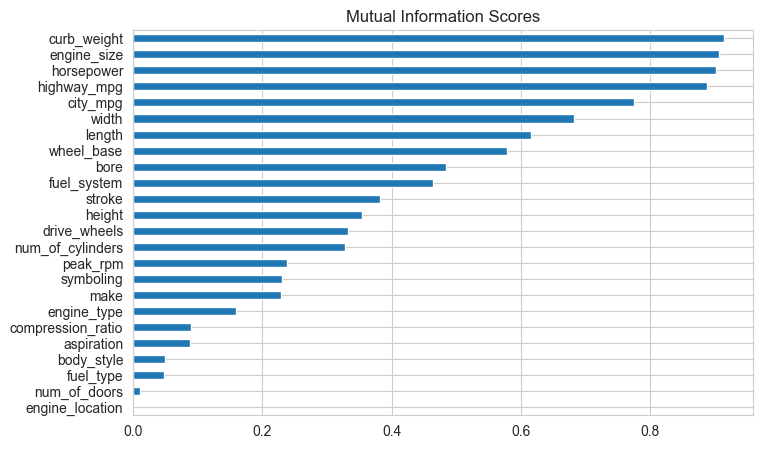

In [31]:
def plot_mi_scores(scores):
    scores=mi_scores.sort_values(ascending=True)
    scores.plot(kind="barh")
    plt.title("Mutual Information Scores")
    plt.show()
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

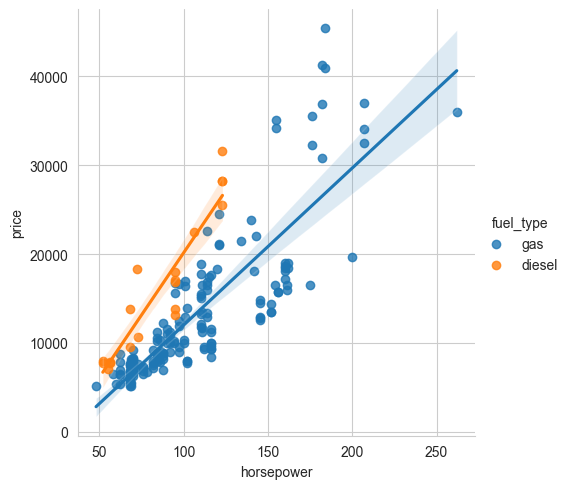

In [32]:
sns.lmplot(data=df,x="horsepower",y="price",hue="fuel_type")